<a href="https://colab.research.google.com/github/FaizFP/Dicoding---Capstone/blob/coba-coba/Coba_Coba%20kode%20terbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

**Load Data**

In [2]:
path = kagglehub.dataset_download("vijayuv/onlineretail")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'onlineretail' dataset.
Path to dataset files: /kaggle/input/onlineretail


In [3]:
df = pd.read_csv('/kaggle/input/onlineretail/OnlineRetail.csv', encoding='ISO-8859-1')
print("Data Awal:", df.shape)
df.head()

Data Awal: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Exploration Data dan Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [8]:
jumlah_duplikat = df.duplicated().sum()
print(f"Total data duplikat: {jumlah_duplikat} baris")

Total data duplikat: 5268 baris


In [9]:
data_duplikat = df[df.duplicated(keep=False)]
print(data_duplikat.sort_values(by='CustomerID').head(10))

       InvoiceNo StockCode                        Description  Quantity  \
395442    571034     23494   VINTAGE DOILY DELUXE SEWING KIT          3   
395443    571034     23494   VINTAGE DOILY DELUXE SEWING KIT          3   
395455    571034     23245         SET OF 3 REGENCY CAKE TINS         4   
395388    571034     23239  SET OF 4 KNICK KNACK TINS POPPIES         6   
395410    571034     23239  SET OF 4 KNICK KNACK TINS POPPIES         6   
395371    571034     23245         SET OF 3 REGENCY CAKE TINS         4   
29743     538826     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
29744     538826     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
479875    577228     22435     SET OF 9 HEART SHAPED BALLOONS         1   
479887    577228     22144     CHRISTMAS CRAFT LITTLE FRIENDS         1   

             InvoiceDate  UnitPrice  CustomerID Country  
395442  10/13/2011 12:47       5.95     12359.0  Cyprus  
395443  10/13/2011 12:47       5.95     12359.0  Cyprus  


/tmp/ipython-input-406598714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


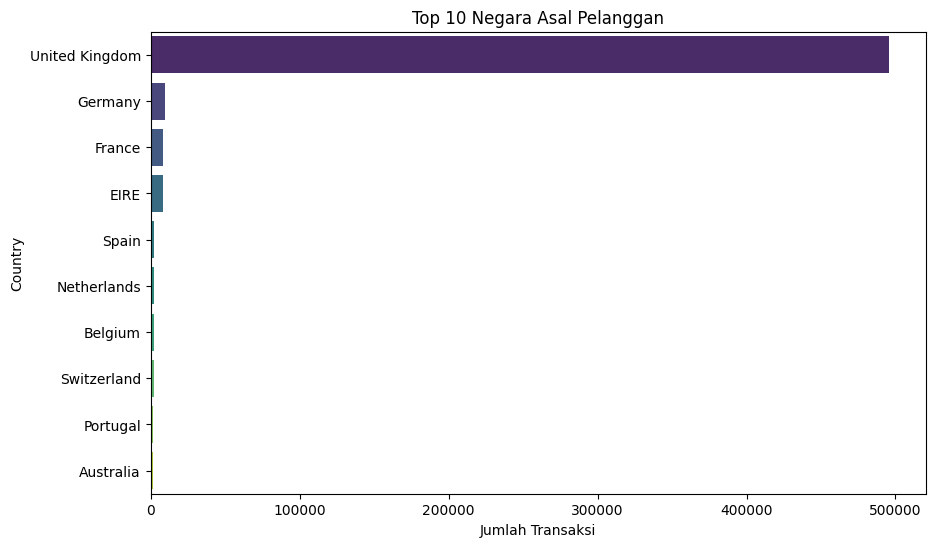

In [10]:
plt.figure(figsize=(10,6))
# Hitung jumlah transaksi per negara
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Negara Asal Pelanggan')
plt.xlabel('Jumlah Transaksi')
plt.show()

/tmp/ipython-input-3583236931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


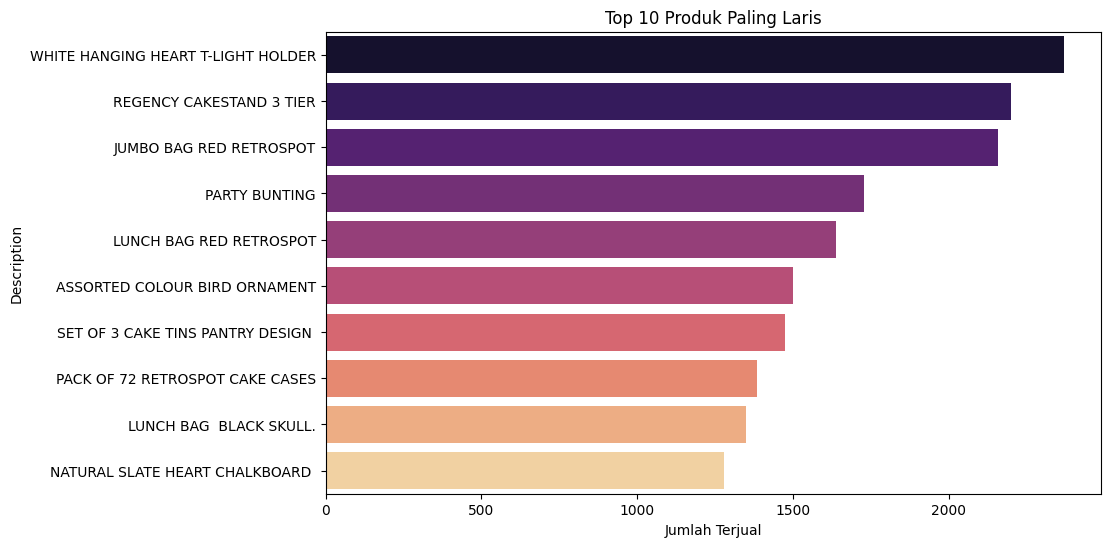

In [11]:
plt.figure(figsize=(10,6))
# Hitung produk berdasarkan frekuensi muncul di struk
top_products = df['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Produk Paling Laris')
plt.xlabel('Jumlah Terjual')
plt.show()

In [12]:
df_clean = df.copy()

# Hapus Baris Tanpa CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

# Konversi Tipe Data
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# 3. Filter Kode StockCode yang Bukan Produk (Sampah/Biaya Admin)
kode_sampah = ['POST', 'D', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK', 'C2']
df_clean = df_clean[~df_clean['StockCode'].isin(kode_sampah)]

# Filter Transaksi Valid (Bukan Pembatalan & Harga Masuk Akal)
df_clean = df_clean[
    (df_clean['Quantity'] > 0) &
    (df_clean['UnitPrice'] > 0) &
    (~df_clean['InvoiceNo'].astype(str).str.contains('C', na=False))
]

# Hapus Duplikat
df_clean = df_clean.drop_duplicates()

# 6. Buat Kolom TotalAmount
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

print(f"Data Bersih Siap Pakai: {df_clean.shape}")

Data Bersih Siap Pakai: (391150, 9)


In [13]:
print(f"Data Awal: {df.shape}")
print(f"Data Setelah Cleaning: {df_clean.shape}")
print("\nCek Statistik Baru (Harusnya Min Quantity & Price > 0):")
print(df_clean[['Quantity', 'UnitPrice']].describe())
print("\nCek Missing Values (Harusnya CustomerID 0):")
print(df_clean.isnull().sum())

Data Awal: (541909, 8)
Data Setelah Cleaning: (391150, 9)

Cek Statistik Baru (Harusnya Min Quantity & Price > 0):
            Quantity      UnitPrice
count  391150.000000  391150.000000
mean       13.145300       2.874372
std       180.807831       4.284738
min         1.000000       0.040000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000     649.500000

Cek Missing Values (Harusnya CustomerID 0):
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


In [14]:
# Tentukan Tanggal Patokan (Snapshot Date)
current_date = df_clean['InvoiceDate'].max() + pd.to_timedelta(1, unit='D')
# Hitung RFM per Customer
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'})

def cap_outliers(df, cols):
    df_capped = df.copy()
    for col in cols:
        upper_limit = df[col].quantile(0.99)
        df_capped[col] = np.where(df_capped[col] > upper_limit, upper_limit, df_capped[col])
    return df_capped

rfm_clean = cap_outliers(rfm, ['Recency', 'Frequency', 'Monetary'])

print("Max Value Sebelum Capping:\n", rfm.max())
print("Max Value Setelah Capping:\n", rfm_clean.max())

# Hasilnya
print("\n--- Tabel RFM (Cleaned) ---")
print(rfm_clean.head())

print("\n--- Info Statistik RFM Cleaned ---")
print(rfm_clean.describe())

Max Value Sebelum Capping:
 Recency         374.00
Frequency       206.00
Monetary     279138.02
dtype: float64
Max Value Setelah Capping:
 Recency        369.000
Frequency       30.000
Monetary     18715.313
dtype: float64

--- Tabel RFM (Cleaned) ---
            Recency  Frequency   Monetary
CustomerID                               
12346         326.0        1.0  18715.313
12347           2.0        7.0   4310.000
12348          75.0        4.0   1437.240
12349          19.0        1.0   1457.550
12350         310.0        1.0    294.400

--- Info Statistik RFM Cleaned ---
           Recency    Frequency      Monetary
count  4334.000000  4334.000000   4334.000000
mean     92.667974     3.986617   1556.776163
std     100.079554     4.846435   2680.322269
min       1.000000     1.000000      3.750000
25%      18.000000     1.000000    304.240000
50%      51.000000     2.000000    662.565000
75%     143.000000     5.000000   1631.622500
max     369.000000    30.000000  18715.313000


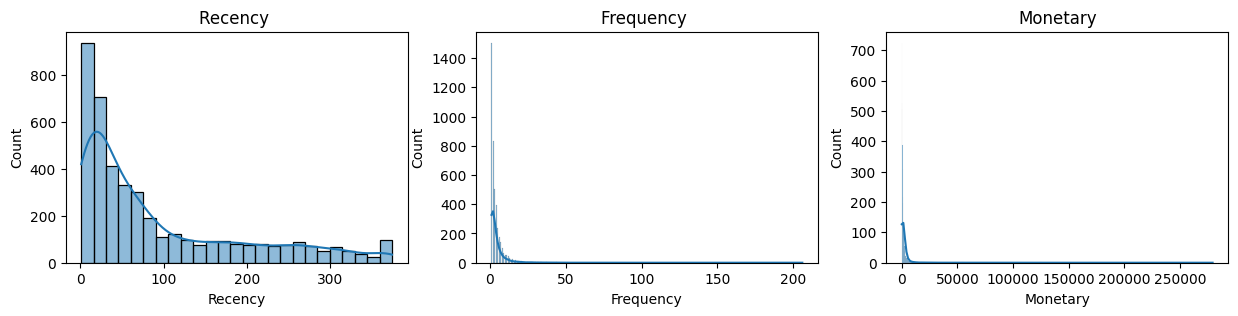

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(rfm['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Recency ')
sns.histplot(rfm['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Frequency ')
sns.histplot(rfm['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Monetary')
plt.show()

In [16]:
rfm_log = np.log1p(rfm_clean)
scaler = StandardScaler()
rfm_scaled = pd.DataFrame(scaler.fit_transform(rfm_log), index=rfm_clean.index, columns=rfm_clean.columns)

print("\nData Siap Model (Scaled):")
print(rfm_scaled.head())

print("\nCek Statistik Baru (Rata-rata/Mean harus mendekati 0):")
print(rfm_scaled.describe().round(2))


Data Siap Model (Scaled):
             Recency  Frequency  Monetary
CustomerID                               
12346       1.460668  -0.969937  2.672768
12347      -2.039109   1.118736  1.473161
12348       0.372075   0.410601  0.576251
12349      -0.623845  -0.969937  0.587708
12350       1.423243  -0.969937 -0.717005

Cek Statistik Baru (Rata-rata/Mean harus mendekati 0):
       Recency  Frequency  Monetary
count  4334.00    4334.00   4334.00
mean      0.00      -0.00     -0.00
std       1.00       1.00      1.00
min      -2.34      -0.97     -4.09
25%      -0.66      -0.97     -0.69
50%       0.09      -0.36     -0.06
75%       0.85       0.69      0.68
max       1.55       3.16      2.67


**Model KMEANS**

In [17]:
k_range = range(2, 11)
inertia_scores = []
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)

    inertia_scores.append(kmeans.inertia_)

    sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"K={k}, Silhouette Score={sil_score:.4f}")

K=2, Silhouette Score=0.4348
K=3, Silhouette Score=0.3374
K=4, Silhouette Score=0.3392
K=5, Silhouette Score=0.3149
K=6, Silhouette Score=0.3127
K=7, Silhouette Score=0.3067
K=8, Silhouette Score=0.2903
K=9, Silhouette Score=0.2740
K=10, Silhouette Score=0.2737


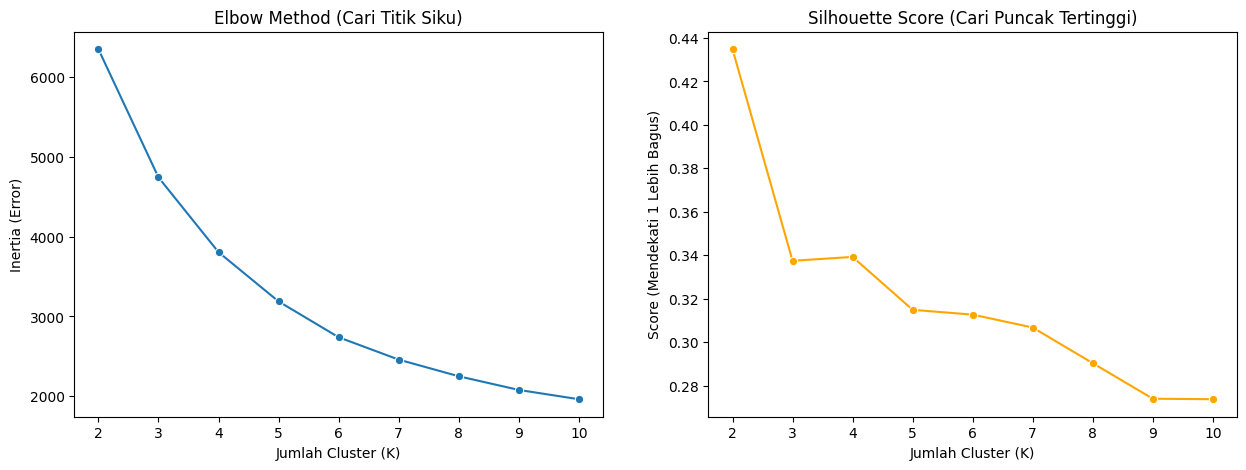

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Grafik 1: Elbow Method (Cari Siku)
sns.lineplot(x=k_range, y=inertia_scores, marker='o', ax=ax[0])
ax[0].set_title('Elbow Method (Cari Titik Siku)')
ax[0].set_xlabel('Jumlah Cluster (K)')
ax[0].set_ylabel('Inertia (Error)')

# Grafik 2: Silhouette Score (Cari Puncak Tertinggi)
sns.lineplot(x=k_range, y=silhouette_scores, marker='o', color='orange', ax=ax[1])
ax[1].set_title('Silhouette Score (Cari Puncak Tertinggi)')
ax[1].set_xlabel('Jumlah Cluster (K)')
ax[1].set_ylabel('Score (Mendekati 1 Lebih Bagus)')

plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)

rfm['Cluster_Labels'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster_Labels').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster_Labels': 'count'
}).rename(columns={'Cluster_Labels': 'Jumlah_Pelanggan'})

cluster_summary['Rank_R'] = cluster_summary['Recency'].rank(ascending=False)
cluster_summary['Rank_F'] = cluster_summary['Frequency'].rank(ascending=True)
cluster_summary['Rank_M'] = cluster_summary['Monetary'].rank(ascending=True)

cluster_summary['Total_Score'] = cluster_summary['Rank_R'] + cluster_summary['Rank_F'] + cluster_summary['Rank_M']

sorted_clusters = cluster_summary.sort_values('Total_Score', ascending=False).index.tolist()

nama_segmen = ['VIP (Sultan)', 'Loyal Customers', 'Potential (Sedang)', 'Low Value (Jarang)']

segment_map = {
    sorted_clusters[0]: nama_segmen[0],  # Juara 1
    sorted_clusters[1]: nama_segmen[1],  # Juara 2
    sorted_clusters[2]: nama_segmen[2],  # Juara 3
    sorted_clusters[3]: nama_segmen[3]   # Juara 4
}

rfm['Segment_Name'] = rfm['Cluster_Labels'].map(segment_map)

print("Mapping Otomatis yang Ditemukan:", segment_map)

print("\n--- Profil Rata-Rata per Segmen (Angka Asli) ---")
print(rfm.groupby('Segment_Name')[['Recency', 'Frequency', 'Monetary']].mean().sort_values('Monetary', ascending=False).round(2))

print("\n--- Jumlah Orang per Segmen ---")
print(rfm['Segment_Name'].value_counts())

Mapping Otomatis yang Ditemukan: {3: 'VIP (Sultan)', 2: 'Loyal Customers', 0: 'Potential (Sedang)', 1: 'Low Value (Jarang)'}

--- Profil Rata-Rata per Segmen (Angka Asli) ---
                    Recency  Frequency  Monetary
Segment_Name                                    
VIP (Sultan)          12.11      13.52   7849.66
Loyal Customers       70.48       4.07   1760.99
Potential (Sedang)    18.70       2.08    527.65
Low Value (Jarang)   183.42       1.31    339.65

--- Jumlah Orang per Segmen ---
Segment_Name
Low Value (Jarang)    1608
Loyal Customers       1171
Potential (Sedang)     830
VIP (Sultan)           725
Name: count, dtype: int64


In [20]:
cluster_summary['Rank_R'] = cluster_summary['Recency'].rank(ascending=False)

cluster_summary['Rank_F'] = cluster_summary['Frequency'].rank(ascending=True)
cluster_summary['Rank_M'] = cluster_summary['Monetary'].rank(ascending=True)

cluster_summary['Total_Score'] = cluster_summary['Rank_R'] + cluster_summary['Rank_F'] + cluster_summary['Rank_M']

sorted_clusters = cluster_summary.sort_values('Total_Score', ascending=False).index.tolist()

nama_segmen = [
    'VIP (Sultan)',
    'Loyal Customers',
    'Potential / New',
    'Low Value / Risk'
]

segment_map = {}
for i, cluster_id in enumerate(sorted_clusters):
    label = nama_segmen[i] if i < len(nama_segmen) else f'Segmen {i+1}'
    segment_map[cluster_id] = label

print(f"Mapping Otomatis Berdasarkan Skor: {segment_map}")

rfm['Segment_Name'] = rfm['Cluster_Labels'].map(segment_map)

# Cek Hasilnya
print(rfm[['Recency', 'Frequency', 'Monetary', 'Segment_Name']].head(10))
print("\n--- Jumlah Pelanggan per Segmen ---")
print(rfm['Segment_Name'].value_counts())

Mapping Otomatis Berdasarkan Skor: {3: 'VIP (Sultan)', 2: 'Loyal Customers', 0: 'Potential / New', 1: 'Low Value / Risk'}
            Recency  Frequency  Monetary      Segment_Name
CustomerID                                                
12346           326          1  77183.60   Loyal Customers
12347             2          7   4310.00      VIP (Sultan)
12348            75          4   1437.24   Loyal Customers
12349            19          1   1457.55   Potential / New
12350           310          1    294.40  Low Value / Risk
12352            36          7   1385.74   Loyal Customers
12353           204          1     89.00  Low Value / Risk
12354           232          1   1079.40  Low Value / Risk
12355           214          1    459.40  Low Value / Risk
12356            23          3   2487.43   Loyal Customers

--- Jumlah Pelanggan per Segmen ---
Segment_Name
Low Value / Risk    1608
Loyal Customers     1171
Potential / New      830
VIP (Sultan)         725
Name: count, dtype: 

/tmp/ipython-input-2736957536.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


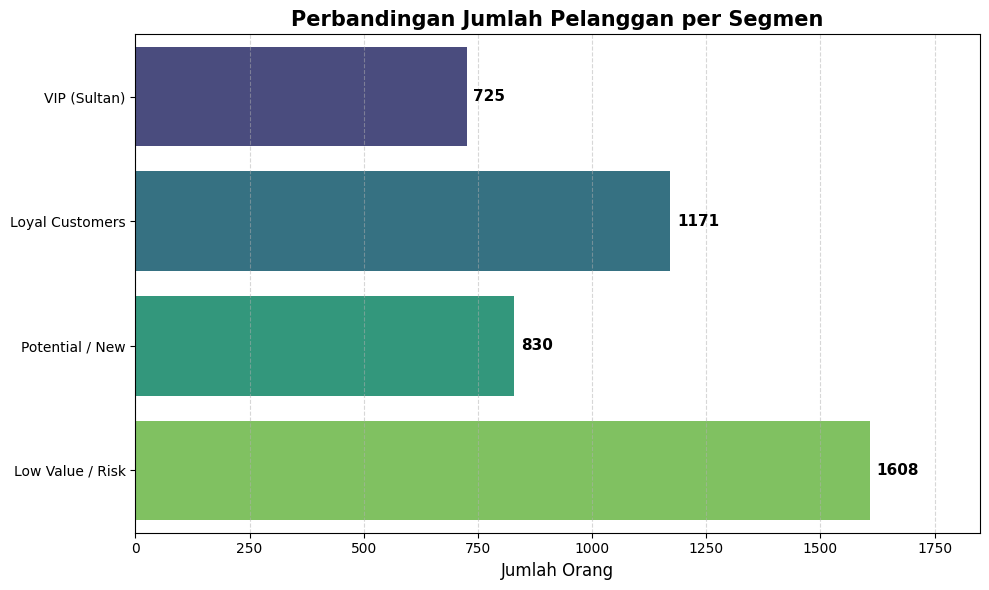

In [21]:
plt.figure(figsize=(10, 6))

data_visual = rfm['Segment_Name'].value_counts()
try:
    data_visual = data_visual.reindex(nama_segmen)
except:
    data_visual = data_visual.sort_values(ascending=False)

data_visual = data_visual.reset_index()
data_visual.columns = ['Segment', 'Jumlah_Pelanggan']

ax = sns.barplot(
    data=data_visual,
    y='Segment',
    x='Jumlah_Pelanggan',
    palette='viridis'
)

plt.title('Perbandingan Jumlah Pelanggan per Segmen', fontsize=15, fontweight='bold')
plt.xlabel('Jumlah Orang', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=11, fontweight='bold')

plt.xlim(right=data_visual['Jumlah_Pelanggan'].max() * 1.15)

plt.tight_layout()
plt.show()

**Model DBSCAN**

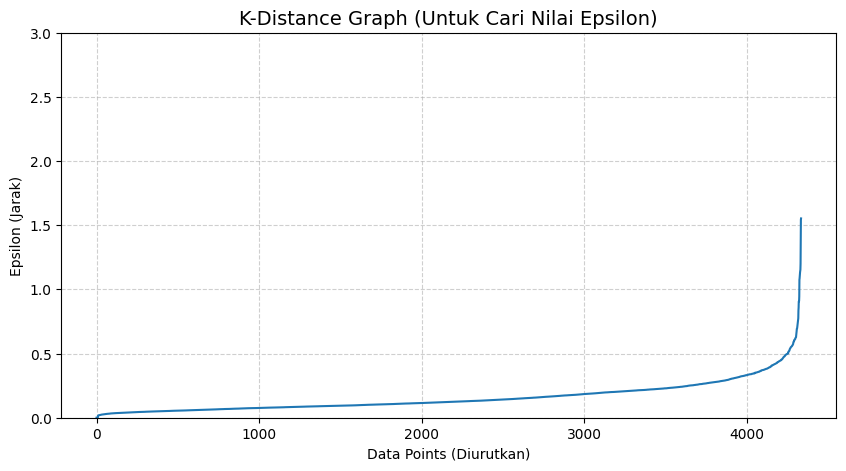

In [22]:
# Menentukan Epsilon
min_pts = 6

#Hitung jarak Epsilon
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(rfm_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_scaled)

# Mengurutkan jakar dari yang terkecil ke terbesar
distances = np.sort(distances[:, min_pts-1], axis=0)

#Grafik
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Distance Graph (Untuk Cari Nilai Epsilon)', fontsize=14)
plt.xlabel('Data Points (Diurutkan)')
plt.ylabel('Epsilon (Jarak)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 3)

plt.show()

In [23]:
# Parameter sesuai grafik
dbscan = DBSCAN(eps=0.5, min_samples=6)

# Melatih daan simpan model
dbscan.fit(rfm_scaled)
rfm['DBSCAN_Labels'] = dbscan.labels_

# Hasil bagi kelompok
print("Jumlah Pelanggan per Cluster DBSCAN ")
print(rfm['DBSCAN_Labels'].value_counts())

print("\n--- Contoh Data Noise (Label -1) ---")
print(rfm[rfm['DBSCAN_Labels'] == -1].head())

Jumlah Pelanggan per Cluster DBSCAN 
DBSCAN_Labels
 0    2809
 1    1495
-1      30
Name: count, dtype: int64

--- Contoh Data Noise (Label -1) ---
            Recency  Frequency  Monetary  Cluster_Labels     Segment_Name  \
CustomerID                                                                  
12346           326          1  77183.60               2  Loyal Customers   
12357            33          1   6207.67               2  Loyal Customers   
12409            79          3  11072.67               2  Loyal Customers   
12433             1          7  13375.87               3     VIP (Sultan)   
12590           211          1   9341.26               2  Loyal Customers   

            DBSCAN_Labels  
CustomerID                 
12346                  -1  
12357                  -1  
12409                  -1  
12433                  -1  
12590                  -1  


**Visualisasi perbandingan**

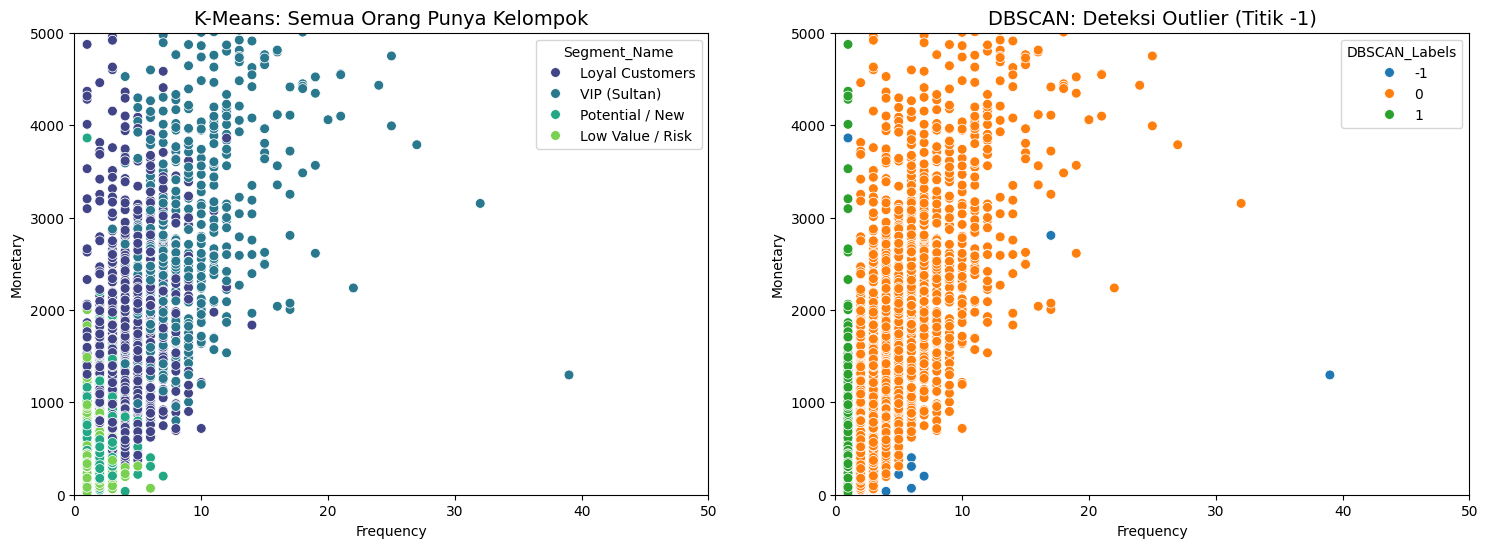

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Grafik Kmeans
sns.scatterplot(
    data=rfm, x='Frequency', y='Monetary',
    hue='Segment_Name', palette='viridis', s=50, ax=ax[0]
)
ax[0].set_title('K-Means: Semua Orang Punya Kelompok', fontsize=14)
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 5000)

# Grafik DBScan
sns.scatterplot(
    data=rfm, x='Frequency', y='Monetary',
    hue='DBSCAN_Labels', palette='tab10', s=50, ax=ax[1]
)
ax[1].set_title('DBSCAN: Deteksi Outlier (Titik -1)', fontsize=14)
ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 5000)

plt.show()

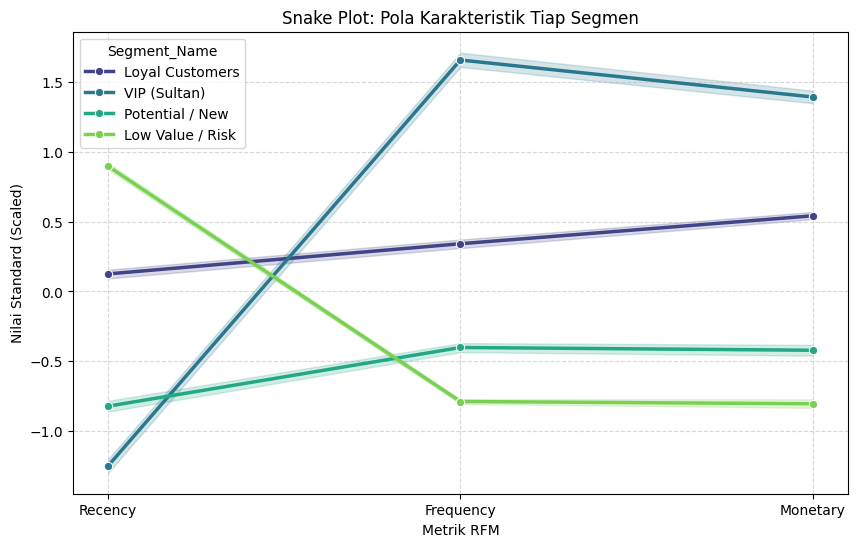

In [25]:
# 1. Siapkan Data
# Masukkan label segmen ke data yang sudah di-scaling
rfm_scaled['Segment_Name'] = rfm['Segment_Name']

# Melt data menjadi format panjang
rfm_melted_scaled = rfm_scaled.melt(
    id_vars=['Segment_Name'],
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

# 2. Gambar Snake Plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=rfm_melted_scaled,
    x='Metric',
    y='Value',
    hue='Segment_Name',
    palette='viridis',
    marker="o", # Pakai titik bulat di tiap garis
    linewidth=2.5
)

plt.title('Snake Plot: Pola Karakteristik Tiap Segmen')
plt.ylabel('Nilai Standard (Scaled)')
plt.xlabel('Metrik RFM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()